# Análise de vendas de jogos de videogames utilizando agrupamento (K-Means)

Fonte de dados: https://www.kaggle.com/gregorut/videogamesales

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 

from sklearn.cluster import KMeans

%matplotlib inline

In [15]:
df = pd.read_csv("vgsales.csv")

In [16]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Text(0.5, 1.0, 'Amostras por ano')

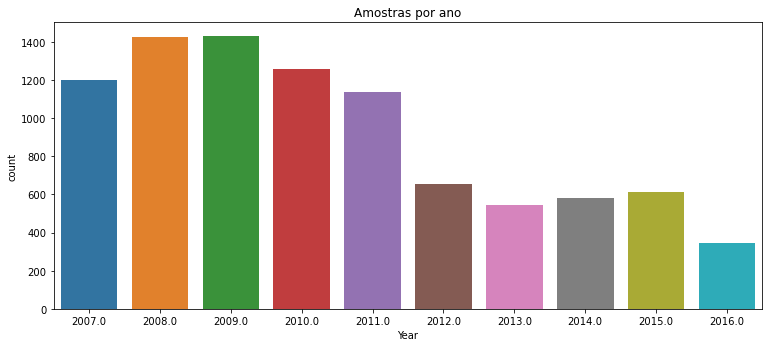

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 5.27)
sns.countplot(x='Year', data=df[(df["Year"] >= 2007) & (df["Year"] <= 2016)])
plt.title("Amostras por ano")

In [19]:
# Filtrando jogos que foram vendidos em todas as regiões entre 2007 e 2010 abaixo de 1 milhão de dolares
df_sales = df[(df["Year"] >= 2007) & (df["Year"] <= 2010)]
df_sales = df_sales[(df_sales['NA_Sales'] > 0) & (df_sales['EU_Sales'] > 0) & (df_sales['JP_Sales'] > 0) & (df_sales['Global_Sales'] < 1.0)]
df_sales["Name"] = df_sales["Name"] + " (" + df_sales["Genre"] + ", " + df_sales["Platform"] + ")"


In [20]:
# Recuperando o ranking de vendas 
df_sales_genre = df_sales.groupby(["Genre"]).aggregate("sum")[['Global_Sales']].sort_values(['Global_Sales'],ascending=True).head(3)
df_sales_genre

,Global_Sales
Genre,
Puzzle,3.81
Misc,4.55
Adventure,4.58


In [21]:
df_sales = df_sales[df_sales["Genre"].isin(df_sales_genre.index)].drop(['Rank','Genre','Platform'], axis=1)
df_sales.head()

,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2314,"Samba De Amigo (Misc, Wii)",2008.0,Sega,0.42,0.37,0.01,0.10,0.90
2535,"Patapon (Misc, PSP)",2007.0,Sony Computer Entertainment,0.33,0.25,0.07,0.17,0.81
2642,"Tetris Party Deluxe (Puzzle, DS)",2010.0,Nintendo,0.29,0.30,0.12,0.07,0.78
2714,Ace Attorney Investigations: Miles Edgeworth (...,2009.0,Capcom,0.27,0.15,0.30,0.04,0.76
3045,Phoenix Wright: Ace Attorney - Trials and Trib...,2007.0,Capcom,0.33,0.05,0.25,0.04,0.67


In [22]:
data_array = df_sales[['NA_Sales', 'EU_Sales', 'JP_Sales']].values

kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, random_state=101)

Text(0, 0.5, 'Média de vendas (milhões)')

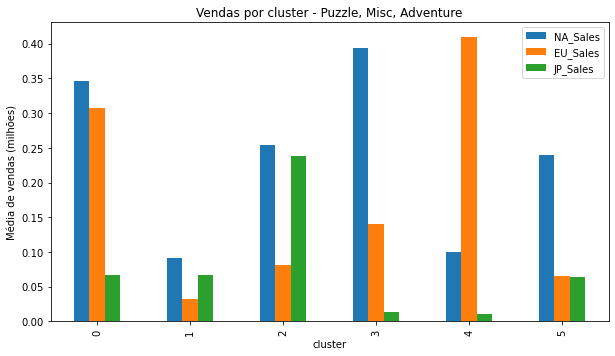

In [23]:
legends = [
    "Títulos com vendas máximas em NA e EU e mínimas em JP",
    "Títulos com vendas mínimas em todas as regiões",
    "Títulos com vendas médias em NA e JP e mínimas em EU",
    "Títulos com vendas máximas em NA, médias em EU e mínimas em JP",
    "Títulos com vendas máximas na EU e vendas mínimas em NA e JP",
    "Títulos com vendas máximas em NA e vendas mínimas em EU e JP"
          ]

df_sales["cluster"] = kmeans.fit_predict(data_array)
grouped = df_sales.groupby(["cluster"]).aggregate("mean")[['NA_Sales', 'EU_Sales', 'JP_Sales']]
grouped.plot.bar(figsize=(10,5.5))
plt.title("Vendas por cluster - " + df_sales_genre.index.str.cat(sep=', '))
plt.ylabel('Média de vendas (milhões)')


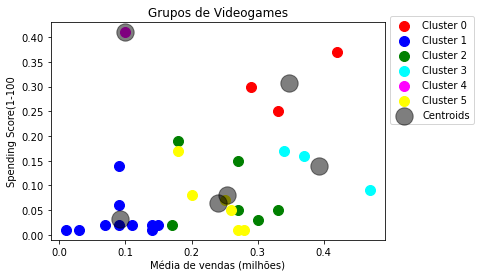

In [24]:
plt.scatter(data_array[kmeans.labels_==0, 0], data_array[kmeans.labels_==0, 1], s=100, c='red', label ='Cluster 0')
plt.scatter(data_array[kmeans.labels_==1, 0], data_array[kmeans.labels_==1, 1], s=100, c='blue', label ='Cluster 1')
plt.scatter(data_array[kmeans.labels_==2, 0], data_array[kmeans.labels_==2, 1], s=100, c='green', label ='Cluster 2')
plt.scatter(data_array[kmeans.labels_==3, 0], data_array[kmeans.labels_==3, 1], s=100, c='cyan', label ='Cluster 3')
plt.scatter(data_array[kmeans.labels_==4, 0], data_array[kmeans.labels_==4, 1], s=100, c='magenta', label ='Cluster 4')
plt.scatter(data_array[kmeans.labels_==5, 0], data_array[kmeans.labels_==5, 1], s=100, c='yellow', label ='Cluster 5')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5, label ='Centroids'); 

plt.title('Grupos de Videogames')
plt.xlabel('Média de vendas (milhões)')
plt.ylabel('Spending Score(1-100')
plt.legend(bbox_to_anchor=(1.0, 1.05))
plt.show()



In [25]:
import plotly_express as px

px.scatter_3d(df_sales, x=data_array[:,0], y=data_array[:,1], z=data_array[:,2], size=kmeans.labels_+1,
              color=kmeans.labels_)

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Name,,,,
"Tetris Party Deluxe (Puzzle, DS)",0.29,0.30,0.12,0.78
"Patapon (Misc, PSP)",0.33,0.25,0.07,0.81
"Samba De Amigo (Misc, Wii)",0.42,0.37,0.01,0.90


Text(0.5, 1.0, 'Títulos com vendas máximas em NA e EU e mínimas em JP')

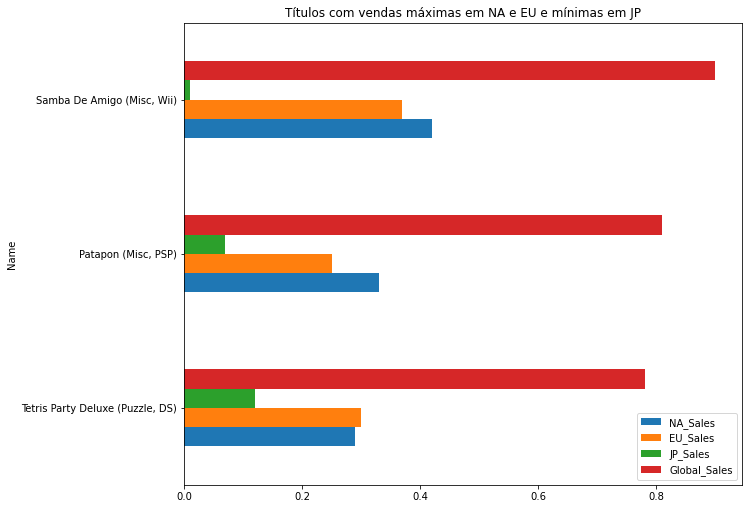

In [29]:
cluster = 0

grouped_cluster = df_sales[(df_sales['cluster'] == cluster)].groupby(["Name"]).aggregate("mean").sort_values(['Global_Sales'],ascending=True)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].head(10)

display(grouped_cluster)

grouped_cluster.plot.barh(figsize=(10,8.5))
display(plt.title(legends[cluster]))